Anirudh Margam

CSCE439-500

730002982

q1. Load the Covertype dataset from https://archive.ics.uci.edu/dataset/31/covertype into your
Jupyter notebook

q2. For each of elevation, aspect, slope, horizontal distance to roadways, have your notebook
output the min, max, mean, and standard deviation

q3. Have your notebook create histograms for the elevation, slope, hillside_noon of cover types 1, 2
and 3 (9 histograms)

GRADING:
5 points – correctly loads Covertype dataset into a Jupyter notebook
24 points – computes statistics correctly (min, max, mean, stddev of 4 attributes)
36 points – creates histograms with appropriate labels and ranges for each class/attribute pair (9
histograms)
10 points – uses Markdown appropriately to create an easy to read program with properly labeled
results

APPROACH:
1. imports + load dataset files  (q1)
2. statistics (q2)
3. histograms (q3)


In [66]:
# 1. imports + load dataset files 
import gzip
import pandas as pd
import matplotlib.pyplot as plt

# Path to files
path_to_data_gz = "/Users/animargam/cssoftware/educationlearning/tamu/csce439dataanalyticscybersecurity/Datasets/covertype/covtype.data.gz"
path_to_info = "/Users/animargam/cssoftware/educationlearning/tamu/csce439dataanalyticscybersecurity/Datasets/covertype/covtype.info"
path_to_old_info = "/Users/animargam/cssoftware/educationlearning/tamu/csce439dataanalyticscybersecurity/Datasets/covertype/old_covtype.info"

# decompress file + read into pandas df
with gzip.open(path_to_data_gz, 'rt') as f:
    df = pd.read_csv(f, header=None)

def read_info_file(file_path):
    with open(file_path, 'r') as f:
        content = f.read()
    return content

info_file1_content = read_info_file(path_to_info)
info_file2_content = read_info_file(path_to_old_info)

In [67]:
print('covtype.info content:')
print(info_file1_content)

covtype.info content:
The Forest CoverType dataset


1.	Title of Database:

	Forest Covertype data


2.	Sources:

	(a) Original owners of database:
		Remote Sensing and GIS Program
		Department of Forest Sciences
		College of Natural Resources
		Colorado State University
		Fort Collins, CO  80523
		(contact Jock A. Blackard, jblackard 'at' fs.fed.us
		      or Dr. Denis J. Dean, denis.dean 'at' utdallas.edu)

	NOTE:	Reuse of this database is unlimited with retention of 
		copyright notice for Jock A. Blackard and Colorado 
		State University.

	(b) Donors of database:
		Jock A. Blackard (jblackard 'at' fs.fed.us)
		GIS Coordinator
		USFS - Forest Inventory & Analysis
		Rocky Mountain Research Station
		507 25th Street
		Ogden, UT 84401

		Dr. Denis J. Dean (denis.dean 'at' utdallas.edu)
		Professor
		Program in Geography and Geospatial Sciences
		School of Economic, Political and Policy Sciences
		800 West Campbell Rd
		Richardson, TX  75080-3021 
		
		Dr. Charles W. Anderson (anderson

In [68]:
print('old_covtype.info content:')
print(info_file2_content)

old_covtype.info content:
The Forest CoverType dataset


1.	Title of Database:

	Forest Covertype data


2.	Sources:

	(a) Original owners of database:
		Remote Sensing and GIS Program
		Department of Forest Sciences
		College of Natural Resources
		Colorado State University
		Fort Collins, CO  80523
		(contact Jock A. Blackard, jblackard/wo_ftcol@fs.fed.us
		      or Dr. Denis J. Dean, denis@cnr.colostate.edu)

	NOTE:	Reuse of this database is unlimited with retention of 
		copyright notice for Jock A. Blackard and Colorado State University.

	(b) Donors of database:
		Jock A. Blackard (jblackard/wo_ftcol@fs.fed.us)
		USDA Forest Service
		3825 E. Mulberry
		Fort Collins, CO  80524  USA

		Dr. Denis J. Dean (denis@cnr.colostate.edu)
		Associate Professor
		Department of Forest Sciences
		Colorado State University
		Fort Collins, CO  80523  USA

		Dr. Charles W. Anderson (anderson@cs.colostate.edu)
		Associate Professor
		Department of Computer Science
		Colorado State University
		For

In [69]:
df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


## Dataset Description
The Forest CoverType dataset comes from the Remote Sensing and GIS Program at Colorado State University. The dataset is comprised of 581012 instances with 55 columns of information. The dataset can be used to predict forest cover types based on some geographical variables.

Attributes of the dataset include quantitative measurements ike elevation, aspect, slope, distances to hydrology and roadways, and hillshade indices. The dataset also includes qualitative variables like wilderness area and soil type designations, as well as the target variable "Cover Type", representing the forest cover type. The Cover Type variable is represented using an integer from 1 to 7, where each enumeration represents a different type of cover - for example, a value of 1 corresponds to a Spruce-Fir cover type, a value of 2 corresponds to a Lodgepole Pine cover type, etc. See the last sections of the info file for the complete list.

The dataset's context involved predicting forest cover type in the Roosevelt National Forest. The study areas included wilderness areas with minimal human-caused disturbances, meaning the cover types were reflective of ecological processes more than human ones.

This dataset has been used for various research studies to compare the accuracy of predictive models like neural networks and discriminant analysis.

The dataset is notable for its size, diverse attributes, and ability to predict forest cover types based on geographical features.

In [70]:
# 2. calculate and display stats for all columns
statistics_df = df.describe()
statistics_df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [71]:
# elevation, aspect, slope, horizontal distance to roadways
# first three columns are elevation (column index 0), aspect (column index 1), slope (column index 2)
# 6th column (column index 5) is horizontal distance to roadways. 
# we need min/max/mean/std

elevation_mean = statistics_df.at['mean', 0]
elevation_min = statistics_df.at['min', 0]
elevation_max = statistics_df.at['max', 0]
elevation_std = statistics_df.at['std', 0]
aspect_mean = statistics_df.at['mean', 1]
aspect_min = statistics_df.at['min', 1]
aspect_max = statistics_df.at['max', 1]
aspect_std = statistics_df.at['std', 1]
slope_mean = statistics_df.at['mean', 2]
slope_min = statistics_df.at['min', 2]
slope_max = statistics_df.at['max', 2]
slope_std = statistics_df.at['std', 2]
horiz_dist_to_roadway_mean = statistics_df.at['mean', 5]
horiz_dist_to_roadway_min = statistics_df.at['min', 5]
horiz_dist_to_roadway_max = statistics_df.at['max', 5]
horiz_dist_to_roadway_std = statistics_df.at['std', 5]

print('summary statistics (min, max, mean, std) for elevation, aspect, slope, horizontal distance to roadways\n')
print('\t\t\t\t\t\t\tmin\tmax\tmean\t\t\tstd')
print(f'elevation (meters):\t\t\t\t\t{elevation_min}\t{elevation_max}\t{elevation_mean}\t{elevation_std}')
print(f'aspect (degrees azimuth):\t\t\t\t{aspect_min}\t{aspect_max}\t{aspect_mean}\t{aspect_std}')
print(f'slope (degrees):\t\t\t\t\t{slope_min}\t{slope_max}\t{slope_mean}\t{slope_std}')
print(f'horizontal distance to roadway (meters):\t\t{horiz_dist_to_roadway_min}\t{horiz_dist_to_roadway_max}\t{horiz_dist_to_roadway_mean}\t{horiz_dist_to_roadway_std}')

summary statistics (min, max, mean, std) for elevation, aspect, slope, horizontal distance to roadways

							min	max	mean			std
elevation (meters):					1859.0	3858.0	2959.365300544567	279.98473425063816
aspect (degrees azimuth):				0.0	360.0	155.65680743254873	111.91372100329545
slope (degrees):					0.0	66.0	14.103703537964792	7.488241814480137
horizontal distance to roadway (meters):		0.0	7117.0	2350.1466114297123	1559.2548698976088


In [72]:
# histograms for the elevation, slope, hillside_noon of cover types 1, 2 and 3 (9 histograms)
# elevation is column 1/0.
# slope is column 3/2.
# hillshade_noon is column 8/7.
# last (55th) column is cover types - index 54

## Histograms

Now we can create histograms to show the frequency/distribution of variables like elevation, slope, and hillshade noon for particular cover types.

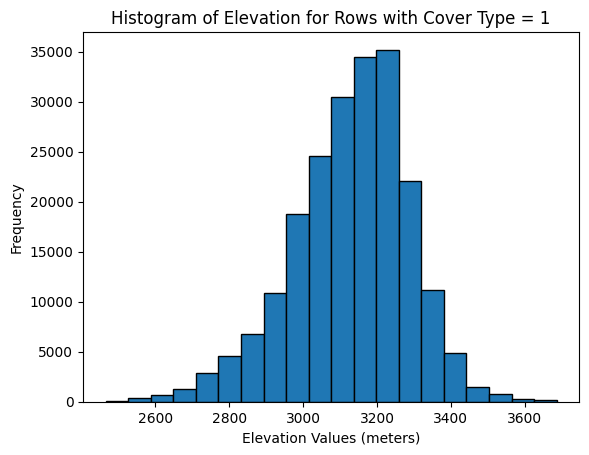

In [73]:
# histogram - elevation - cover type 1
filtered_df = df[df.iloc[:, 54] == 1]
plt.hist(filtered_df.iloc[:, 0], bins=20, edgecolor='black')  
plt.xlabel('Elevation Values (meters)')
plt.ylabel('Frequency')
plt.title('Histogram of Elevation for Rows with Cover Type = 1')
plt.show()

### Histogram Summary
The histogram is slightly skewed left but somewhat symmetric overall. There is a single mode around 3200 meters, which occurred ~ 35000 times. The variability does not appear to be very high. There do not appear to be any significant outliers.

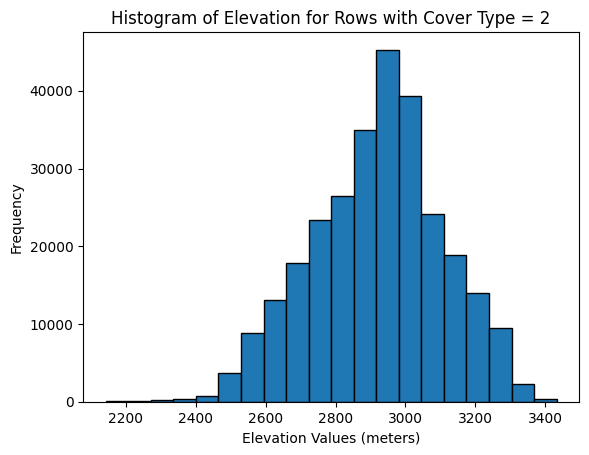

In [74]:
# histogram - elevation - cover type 2
filtered_df = df[df.iloc[:, 54] == 2]
plt.hist(filtered_df.iloc[:, 0], bins=20, edgecolor='black')  
plt.xlabel('Elevation Values (meters)')
plt.ylabel('Frequency')
plt.title('Histogram of Elevation for Rows with Cover Type = 2')
plt.show()

### Histogram Summary
The histogram is slightly skewed left but pretty symmetric overall. There is a single mode around 2900 meters, which occurred over 40000 times. The variability does not appear to be very high. There do not appear to be any significant outliers.

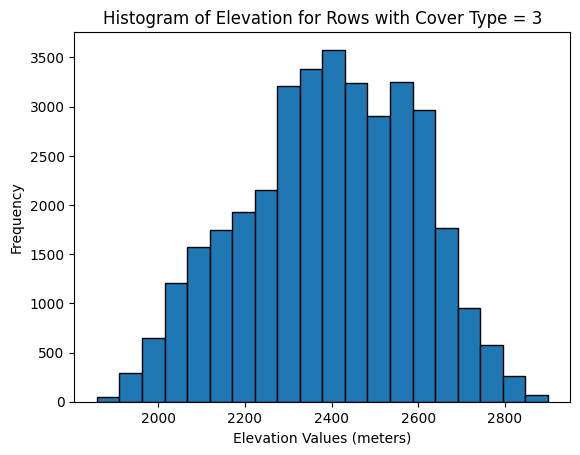

In [75]:
# histogram - elevation - cover type 3
filtered_df = df[df.iloc[:, 54] == 3]
plt.hist(filtered_df.iloc[:, 0], bins=20, edgecolor='black')  
plt.xlabel('Elevation Values (meters)')
plt.ylabel('Frequency')
plt.title('Histogram of Elevation for Rows with Cover Type = 3')
plt.show()

### Histogram Summary
The histogram is not very symmetrical. There are 2 modes around 2400 and 2600 meters, which occurred ~ 3500 and 3250 times, respectively. The variability here appears to be higher than compared to the previous histograms.. There do not appear to be any significant outliers.

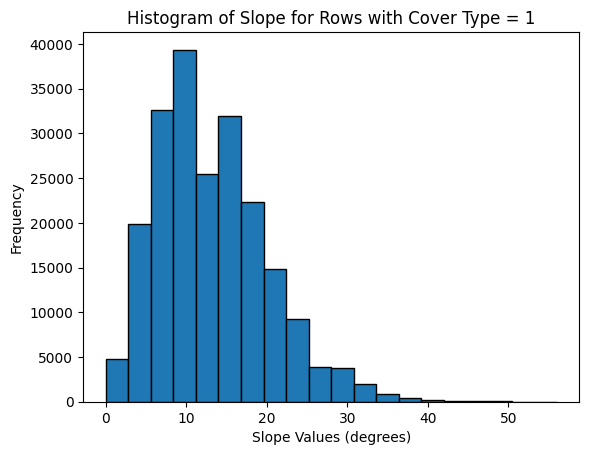

In [76]:
# histogram - slope - cover type 1
filtered_df = df[df.iloc[:, 54] == 1]
plt.hist(filtered_df.iloc[:, 2], bins=20, edgecolor='black')  
plt.xlabel('Slope Values (degrees)')
plt.ylabel('Frequency')
plt.title('Histogram of Slope for Rows with Cover Type = 1')
plt.show()

### Histogram Summary
This histogram is surprisingly somewhat symmetrical. There are 2 modes around 25 and 350 degrees, which occurred ~ 17500 and 12500 times, respectively. The variability here is quite high, and the distribution does not look even close to "normal".

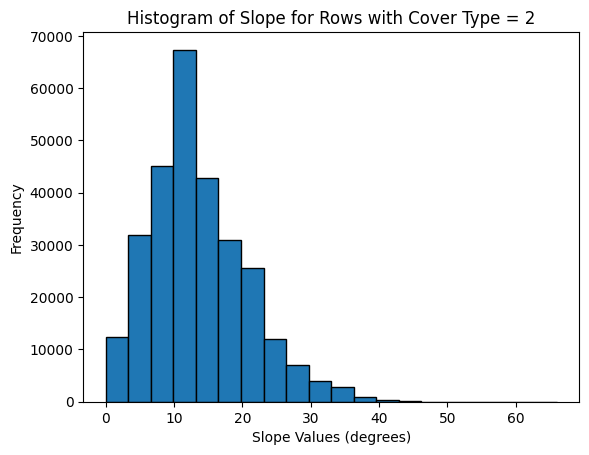

In [77]:
# histogram - slope - cover type 2
filtered_df = df[df.iloc[:, 54] == 2]
plt.hist(filtered_df.iloc[:, 2], bins=20, edgecolor='black')  
plt.xlabel('Slope Values (degrees)')
plt.ylabel('Frequency')
plt.title('Histogram of Slope for Rows with Cover Type = 2')
plt.show()

### Histogram Summary
The histogram is not very symmetrical. There are 2 modes around 50 and 350 degrees, which occurred ~ 20000 and 15000 times, respectively. The variability here is very high.

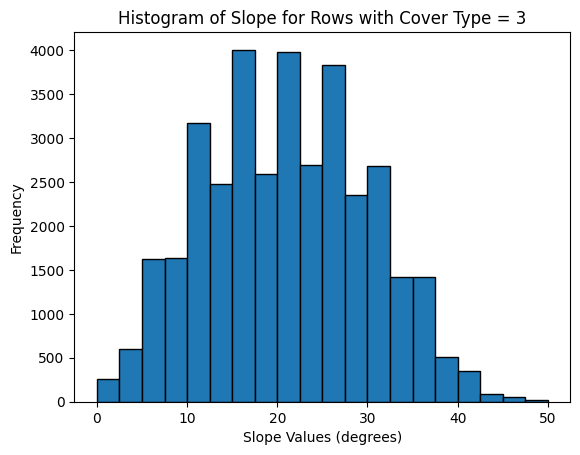

In [78]:
# histogram - slope - cover type 3
filtered_df = df[df.iloc[:, 54] == 3]
plt.hist(filtered_df.iloc[:, 2], bins=20, edgecolor='black')  
plt.xlabel('Slope Values (degrees)')
plt.ylabel('Frequency')
plt.title('Histogram of Slope for Rows with Cover Type = 3')
plt.show()

### Histogram Summary
The histogram is not symmetrical. There are 2 modes around 110 and 325 meters, which both occurred ~ 2500 times. The variability here is very high and not "Normal" at all.

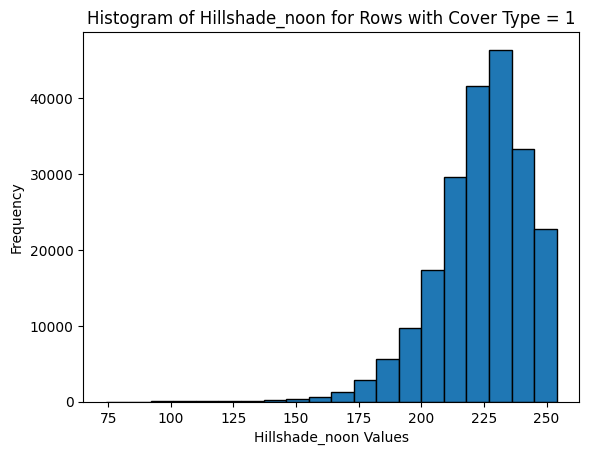

In [79]:
# histogram - hillshade_noon - cover type 1
filtered_df = df[df.iloc[:, 54] == 1]
plt.hist(filtered_df.iloc[:, 7], bins=20, edgecolor='black')  
plt.xlabel('Hillshade_noon Values')
plt.ylabel('Frequency')
plt.title('Histogram of Hillshade_noon for Rows with Cover Type = 1')
plt.show()

### Histogram Summary
The histogram is not very symmetrical and is skewed left. There is a single mode around 230, which occurred over 40000 times. The variability here is not very high. There do not appear to be any significant outliers.

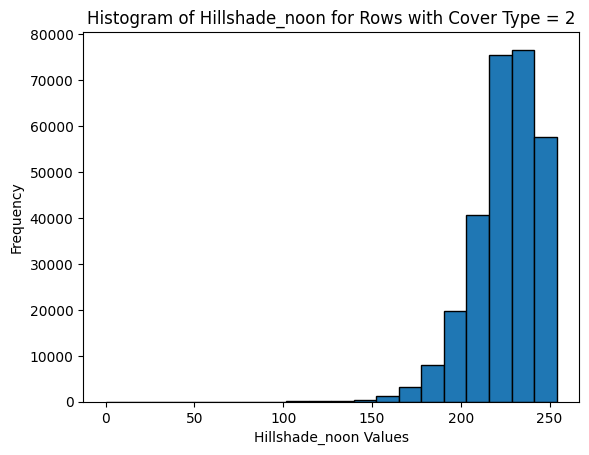

In [80]:
# histogram - hillshade_noon - cover type 2
filtered_df = df[df.iloc[:, 54] == 2]
plt.hist(filtered_df.iloc[:, 7], bins=20, edgecolor='black')  
plt.xlabel('Hillshade_noon Values')
plt.ylabel('Frequency')
plt.title('Histogram of Hillshade_noon for Rows with Cover Type = 2')
plt.show()

### Histogram Summary
The histogram is somewhat symmetrical and heavily skewed left. There is a single mode occuring at an index of 225, which occurred ~75000 times. The variability here is pretty low. There do not appear to be any significant outliers.

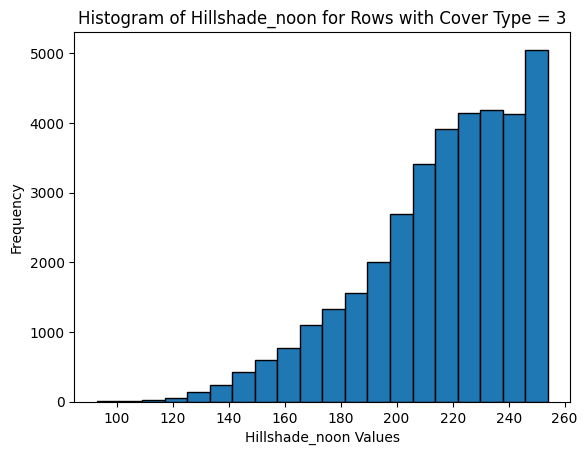

In [81]:
# histogram - hillshade_noon - cover type 3
filtered_df = df[df.iloc[:, 54] == 3]
plt.hist(filtered_df.iloc[:, 7], bins=20, edgecolor='black')  
plt.xlabel('Hillshade_noon Values')
plt.ylabel('Frequency')
plt.title('Histogram of Hillshade_noon for Rows with Cover Type = 3')
plt.show()

### Histogram Summary
The histogram is not symmetrical and is skewed left. There is a mode around 255, which occurred ~5000 times. The variability here is higher than compared to the previous 2 histograms. There do not appear to be any significant outliers.